<a href="https://colab.research.google.com/github/Vorlde/Finsearch_Option_Pricing/blob/main/BS_vc_MontCarlo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import numpy.random as npr
from scipy.stats import norm

In [2]:
r = 0.06
sigma = 0.3
T = 1.0
S0 = 100

Ite = 100000
M = 100

dt = T / M

S = np.zeros((M + 1, Ite))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp(
        (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(Ite)
    )

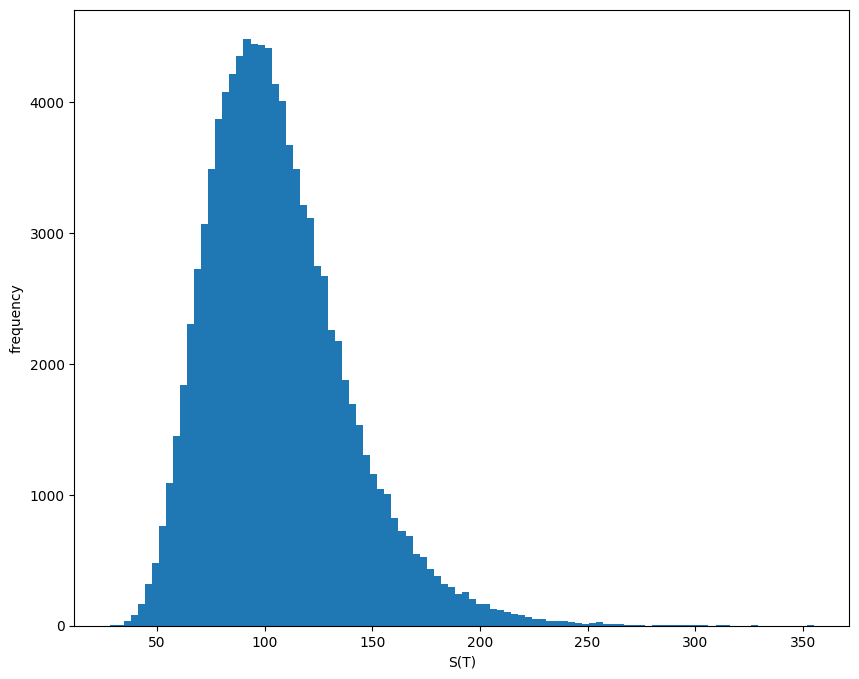

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(S[-1], bins=100)
plt.xlabel("S(T)")
plt.ylabel("frequency")
plt.show()

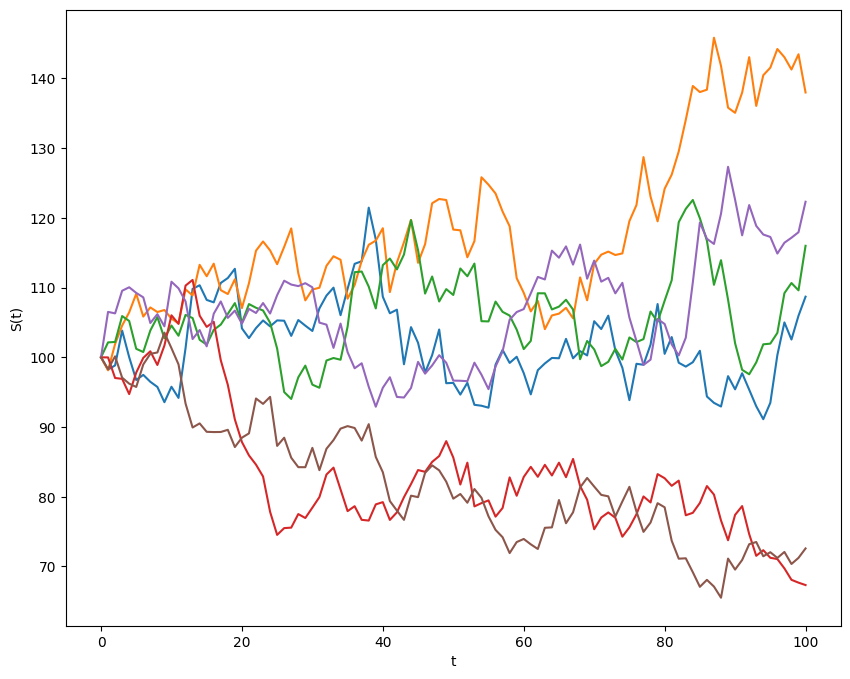

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(S[:, :6])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.show()

In [5]:
def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

European call option with the following characteristics:

- $S_0=100$
- $K=95$
- $r=0.06$
- $\sigma = 0.3$
- $T = 1$ year
- $t = 0$ (present day)
- Number of iterations $I=100000$

In [6]:
print("Monte Carlo Price:", bs_call_mc(100, 95, 0.06, 0.3, 1, 0, 100000))

Monte Carlo Price: 17.326653453883754


In [7]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

In [8]:
print("BS Analytical Price:", bs_call_price(100, 0.06, 0.3, 0, 1, 95))

BS Analytical Price: 17.323563283257634


<ipython-input-9-759dab136ad6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-9-759dab136ad6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-9-759dab136ad6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-9-759dab136ad6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-9-759dab136ad6>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(
<ipython-input-9-759dab136ad6>:4: FutureWarning: The frame.append method is

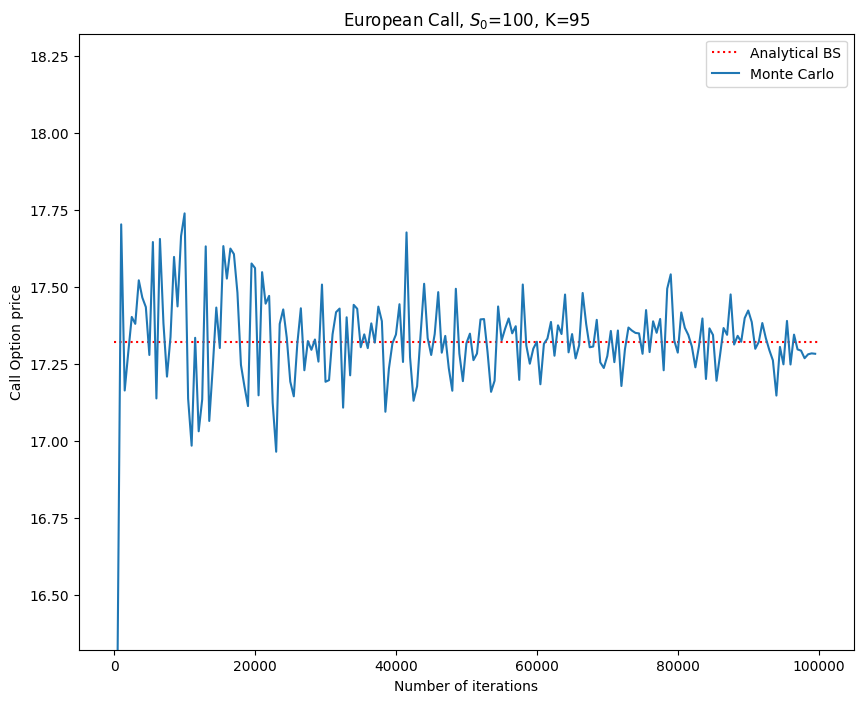

In [9]:
df = pd.DataFrame(columns=["Iter", "BSc"])

for i in range(1, 100000, 500):
    df = df.append(
        {"Iter": i, "BSc": bs_call_mc(100, 95, 0.06, 0.3, 1, 0, i)}, ignore_index=True
    )

plt.figure(figsize=(10, 8))

plt.hlines(
    bs_call_price(100, 0.06, 0.3, 0, 1, 95),
    xmin=0,
    xmax=100000,
    linestyle="dotted",
    colors="red",
    label="Analytical BS",
)
plt.plot(df.set_index("Iter"), lw=1.5, label="Monte Carlo")

plt.title("European Call, $S_0$=100, K=95")
plt.xlabel("Number of iterations")
plt.ylabel("Call Option price")
plt.ylim(
    bs_call_price(100, 0.06, 0.3, 0, 1, 95) - 1,
    bs_call_price(100, 0.06, 0.3, 0, 1, 95) + 1,
)
plt.legend()
plt.show()